In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
test_data = pd.read_csv('test finance.csv')
train_data = pd.read_csv('train finance.csv')

In [4]:
test_data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [5]:
train_data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [6]:
train_data.shape

(23524, 13)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [8]:
train_data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
train_data.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [10]:
train_data.value_counts()

country   year  uniqueid       bank_account  location_type  cellphone_access  household_size  age_of_respondent  gender_of_respondent  relationship_with_head  marital_status           education_level                  job_type                 
Kenya     2018  uniqueid_1     Yes           Rural          Yes               3               24                 Female                Spouse                  Married/Living together  Secondary education              Self employed                1
Tanzania  2017  uniqueid_1798  No            Rural          Yes               4               39                 Female                Head of Household       Single/Never Married     Secondary education              Remittance Dependent         1
                uniqueid_1796  No            Urban          Yes               3               18                 Female                Child                   Divorced/Seperated       Primary education                Self employed                1
             

In [11]:
train_data['bank_account'].dtype #Our target variable

dtype('O')

<Axes: xlabel='bank_account', ylabel='count'>

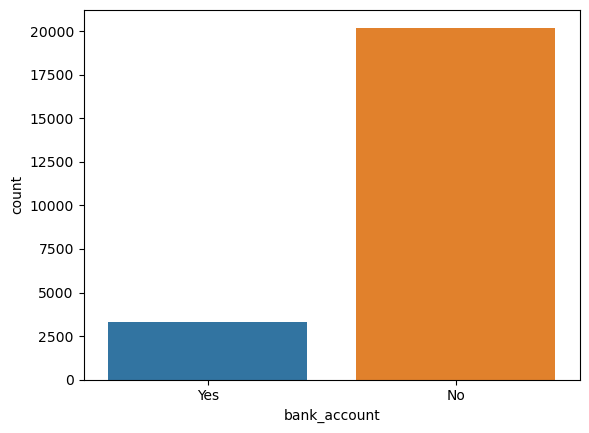

In [12]:
sns.countplot(x='bank_account', data=train_data)

<Axes: xlabel='bank_account', ylabel='count'>

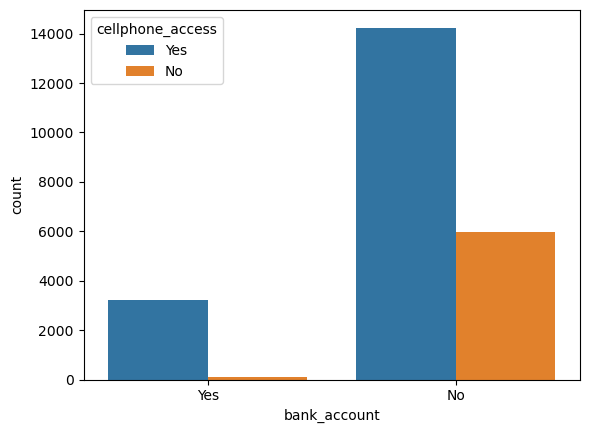

In [13]:
sns.countplot(x='bank_account', hue='cellphone_access', data=train_data)

<Axes: xlabel='bank_account', ylabel='count'>

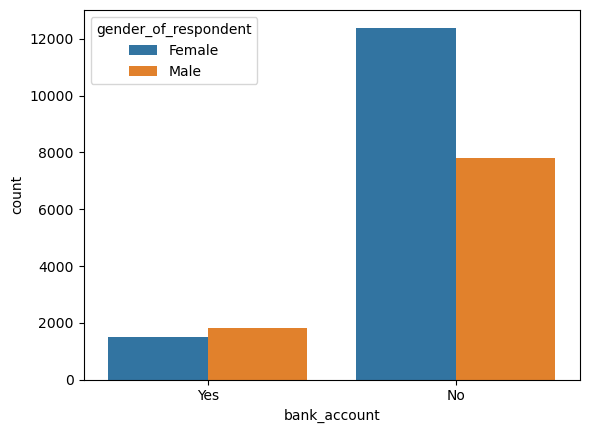

In [14]:
sns.countplot(x='bank_account', hue='gender_of_respondent', data=train_data)

In [15]:
train_data['location_type'].nunique()

2

<Axes: xlabel='bank_account', ylabel='count'>

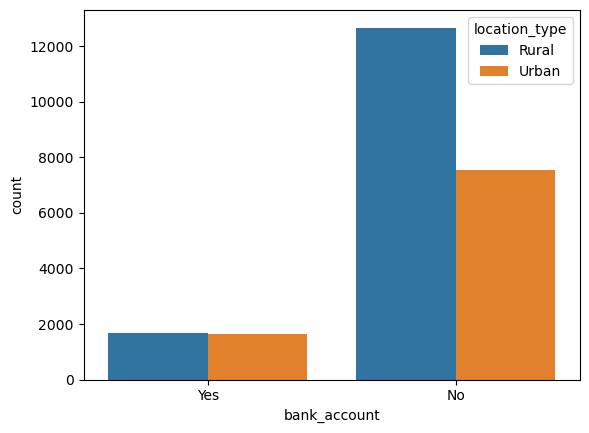

In [16]:
sns.countplot(x='bank_account', hue='location_type', data=train_data)

<Axes: ylabel='Frequency'>

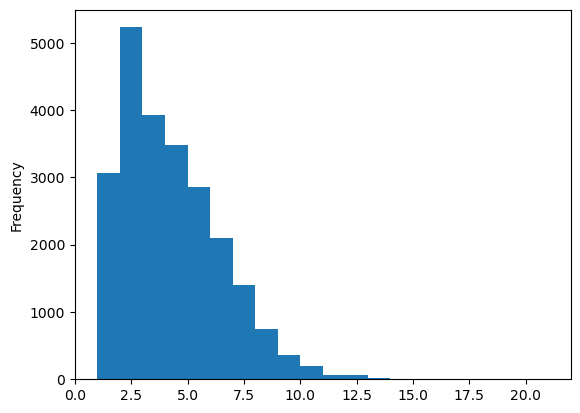

In [17]:
train_data['household_size'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

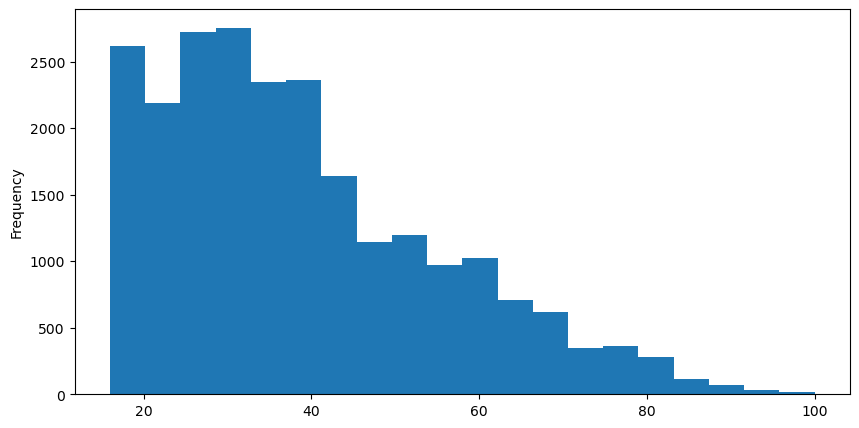

In [18]:
train_data['age_of_respondent'].plot.hist(bins=20, figsize=(10,5))

In [19]:
name= train_data.groupby('bank_account')['age_of_respondent'].mean().reset_index()
name

,bank_account,age_of_respondent
0,No,38.675292
1,Yes,39.598128


<Axes: ylabel='Frequency'>

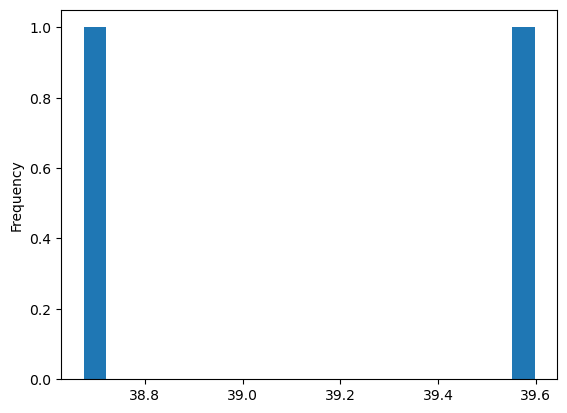

In [20]:
name['age_of_respondent'].plot.hist(bins=20)

<Axes: xlabel='bank_account', ylabel='count'>

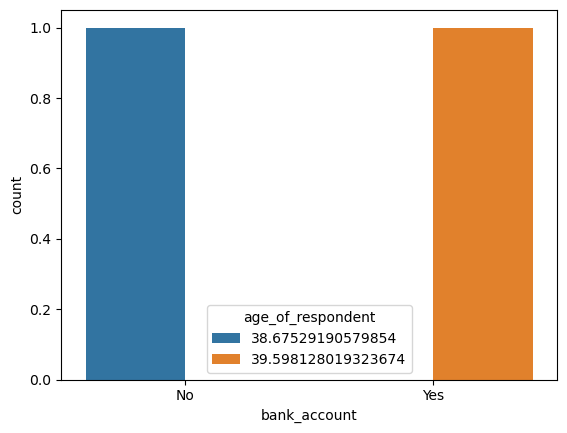

In [21]:
sns.countplot(x='bank_account', hue='age_of_respondent', data=name)

In [22]:
train_data['marital_status'].reset_index()

,index,marital_status
0,0,Married/Living together
1,1,Widowed
2,2,Single/Never Married
3,3,Married/Living together
4,4,Single/Never Married
...,...,...
23519,23519,Divorced/Seperated
23520,23520,Single/Never Married
23521,23521,Widowed
23522,23522,Divorced/Seperated


In [23]:
train_data['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [24]:
train_data['marital_status'].mode().sum()

'Married/Living together'

In [25]:
train_data['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [26]:
train_data['job_type'].mode()

0    Self employed
Name: job_type, dtype: object

In [27]:
train_data['job_type'].nunique()

10

In [28]:
train_data['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [29]:
train_data['education_level'].mode()

0    Primary education
Name: education_level, dtype: object

In [30]:
train_data['relationship_with_head'].value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

In [31]:
train_data['relationship_with_head'].mode()

0    Head of Household
Name: relationship_with_head, dtype: object

In [32]:
name2 = train_data.groupby('country')['year'].mean().reset_index()
name2

,country,year
0,Kenya,2018.0
1,Rwanda,2016.0
2,Tanzania,2017.0
3,Uganda,2018.0


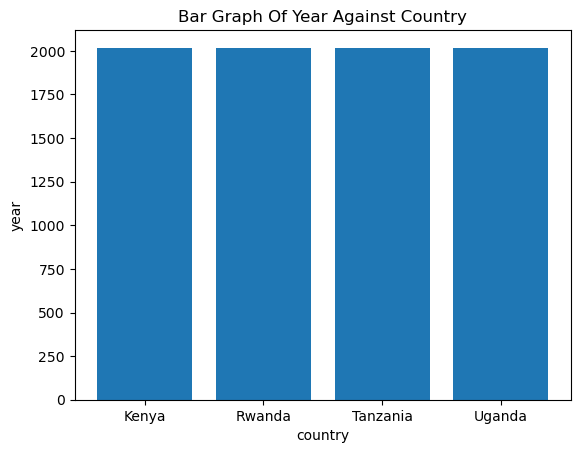

In [33]:
plt.bar(name2['country'], name2['year'])
plt.xlabel('country')
plt.ylabel('year')
plt.title('Bar Graph Of Year Against Country')
plt.show()

In [34]:
train_data['uniqueid'].value_counts()

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: count, Length: 8735, dtype: int64

In [35]:
train_data['uniqueid'].nunique()

8735

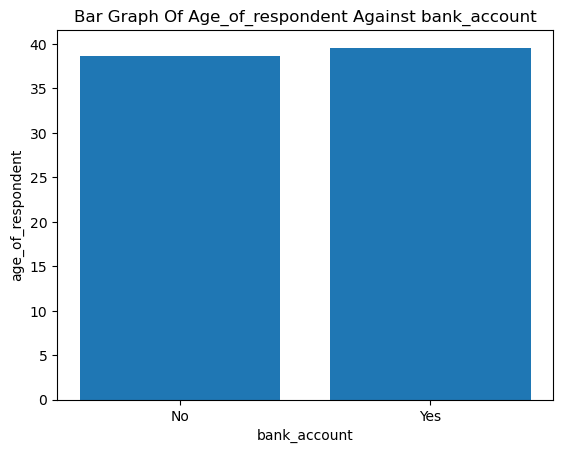

In [36]:
plt.bar(name['bank_account'], name['age_of_respondent'])
plt.xlabel('bank_account')
plt.ylabel('age_of_respondent')
plt.title('Bar Graph Of Age_of_respondent Against bank_account')
plt.show()

In [37]:
train_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [38]:
train_data.duplicated().sum()

0

In [39]:
train_data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [40]:
train_data['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [41]:
train_data['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [42]:
train_data['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [43]:
country1 = pd.get_dummies(train_data['country'], dtype=int, drop_first=True)

In [44]:
country1

,Rwanda,Tanzania,Uganda
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23519,0,0,1
23520,0,0,1
23521,0,0,1
23522,0,0,1


In [45]:
head = pd.get_dummies(train_data['relationship_with_head'], dtype=int, drop_first=True)
head

,Head of Household,Other non-relatives,Other relative,Parent,Spouse
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
23519,1,0,0,0,0
23520,1,0,0,0,0
23521,0,0,0,1,0
23522,0,0,0,1,0


In [46]:
marital = pd.get_dummies(train_data['marital_status'], dtype=int, drop_first=True)
marital

,Dont know,Married/Living together,Single/Never Married,Widowed
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
23519,0,0,0,0
23520,0,0,1,0
23521,0,0,0,1
23522,0,0,0,0


In [47]:
education = pd.get_dummies(train_data['education_level'], dtype=int, drop_first=True)
education

,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
23519,0,0,0,0,0
23520,0,0,1,0,0
23521,0,1,0,0,0
23522,0,0,1,0,0


In [48]:
job = pd.get_dummies(train_data['job_type'], dtype=int, drop_first=True)
job

,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
23519,0,0,0,0,0,0,1,0,0
23520,0,0,0,0,0,0,1,0,0
23521,0,0,0,0,0,0,1,0,0
23522,0,0,0,0,0,0,0,0,1


In [49]:
train_data = pd.concat([train_data,country1,head,marital,education,job], axis=1)

In [50]:
train_data.drop(['country','relationship_with_head', 'marital_status', 'education_level', 'job_type'], axis=1, inplace=True)

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   year                             23524 non-null  int64 
 1   uniqueid                         23524 non-null  object
 2   bank_account                     23524 non-null  object
 3   location_type                    23524 non-null  object
 4   cellphone_access                 23524 non-null  object
 5   household_size                   23524 non-null  int64 
 6   age_of_respondent                23524 non-null  int64 
 7   gender_of_respondent             23524 non-null  object
 8   Rwanda                           23524 non-null  int32 
 9   Tanzania                         23524 non-null  int32 
 10  Uganda                           23524 non-null  int32 
 11  Head of Household                23524 non-null  int32 
 12  Other non-relatives             

In [52]:
train_data['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [53]:
train_data['location_type'] = train_data['location_type'].map({'Rural': 1, 'Urban': 0})

In [54]:
train_data['bank_account'] = train_data['bank_account'].map({'Yes': 1, 'No': 0})

In [55]:
train_data['cellphone_access'] = train_data['cellphone_access'].map({'Yes': 1, 'No': 0})

In [56]:
train_data['gender_of_respondent'] = train_data['gender_of_respondent'].map({'Female': 1, 'Male': 0})

In [57]:
train_data.dtypes

year                                int64
uniqueid                           object
bank_account                        int64
location_type                       int64
cellphone_access                    int64
household_size                      int64
age_of_respondent                   int64
gender_of_respondent                int64
Rwanda                              int32
Tanzania                            int32
Uganda                              int32
Head of Household                   int32
Other non-relatives                 int32
Other relative                      int32
Parent                              int32
Spouse                              int32
Dont know                           int32
Married/Living together             int32
Single/Never Married                int32
Widowed                             int32
Other/Dont know/RTA                 int32
Primary education                   int32
Secondary education                 int32
Tertiary education                

In [58]:
test_data = pd.read_csv('test finance.csv')
test_data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [59]:
country2 = pd.get_dummies(test_data['country'], dtype=int, drop_first=True)
country2

,Rwanda,Tanzania,Uganda
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
10081,0,0,1
10082,0,0,1
10083,0,0,1
10084,0,0,1


In [60]:
head2 = pd.get_dummies(test_data['relationship_with_head'], dtype=int, drop_first=True)
head2

,Head of Household,Other non-relatives,Other relative,Parent,Spouse
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
10081,0,0,0,0,1
10082,1,0,0,0,0
10083,1,0,0,0,0
10084,0,0,0,0,1


In [61]:
test_data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [62]:
marital2 = pd.get_dummies(test_data['marital_status'], dtype=int, drop_first=True)
marital2

,Dont know,Married/Living together,Single/Never Married,Widowed
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
10081,0,1,0,0
10082,0,1,0,0
10083,0,0,1,0
10084,0,1,0,0


In [63]:
education2 = pd.get_dummies(test_data['education_level'], dtype=int, drop_first=True)
education2

,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
10081,0,1,0,0,0
10082,0,1,0,0,0
10083,0,0,1,0,0
10084,0,1,0,0,0


In [64]:
job2 = pd.get_dummies(test_data['job_type'], dtype=int, drop_first=True)
job2

,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
10081,0,0,0,0,0,0,0,0,1
10082,0,0,0,0,0,0,0,0,1
10083,0,0,0,0,0,0,1,0,0
10084,0,0,0,0,0,0,0,0,1


In [65]:
test_data = pd.concat([test_data,country2,head2,marital2,education2,job2], axis=1)

In [66]:
test_data.drop(['country','relationship_with_head', 'marital_status', 'education_level', 'job_type'], axis=1, inplace=True)

In [67]:
test_data

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,Uganda,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,uniqueid_6056,Urban,Yes,3,30,Male,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,uniqueid_6060,Urban,Yes,7,51,Male,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2018,uniqueid_6065,Rural,No,3,77,Female,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,uniqueid_6072,Rural,No,6,39,Female,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,uniqueid_6073,Urban,No,3,16,Male,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,2018,uniqueid_2998,Rural,No,2,62,Female,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10082,2018,uniqueid_2999,Urban,Yes,8,42,Male,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10083,2018,uniqueid_3000,Urban,Yes,1,39,Male,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10084,2018,uniqueid_3001,Rural,Yes,6,28,Female,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [68]:
test_data['cellphone_access'] = test_data['cellphone_access'].map({'Yes': 1, 'No': 0})

In [69]:
test_data['gender_of_respondent'] = test_data['gender_of_respondent'].map({'Female': 1, 'Male': 0})

In [70]:
test_data

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,Uganda,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,uniqueid_6056,Urban,1,3,30,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,uniqueid_6060,Urban,1,7,51,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2018,uniqueid_6065,Rural,0,3,77,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,uniqueid_6072,Rural,0,6,39,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,uniqueid_6073,Urban,0,3,16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,2018,uniqueid_2998,Rural,0,2,62,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10082,2018,uniqueid_2999,Urban,1,8,42,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10083,2018,uniqueid_3000,Urban,1,1,39,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10084,2018,uniqueid_3001,Rural,1,6,28,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [71]:
test_data.isnull().sum()

year                               0
uniqueid                           0
location_type                      0
cellphone_access                   0
household_size                     0
age_of_respondent                  0
gender_of_respondent               0
Rwanda                             0
Tanzania                           0
Uganda                             0
Head of Household                  0
Other non-relatives                0
Other relative                     0
Parent                             0
Spouse                             0
Dont know                          0
Married/Living together            0
Single/Never Married               0
Widowed                            0
Other/Dont know/RTA                0
Primary education                  0
Secondary education                0
Tertiary education                 0
Vocational/Specialised training    0
Farming and Fishing                0
Formally employed Government       0
Formally employed Private          0
G

In [72]:
test_data.dtypes

year                                int64
uniqueid                           object
location_type                      object
cellphone_access                    int64
household_size                      int64
age_of_respondent                   int64
gender_of_respondent                int64
Rwanda                              int32
Tanzania                            int32
Uganda                              int32
Head of Household                   int32
Other non-relatives                 int32
Other relative                      int32
Parent                              int32
Spouse                              int32
Dont know                           int32
Married/Living together             int32
Single/Never Married                int32
Widowed                             int32
Other/Dont know/RTA                 int32
Primary education                   int32
Secondary education                 int32
Tertiary education                  int32
Vocational/Specialised training   

In [73]:
ids = train_data['uniqueid']

In [74]:
ids

0           uniqueid_1
1           uniqueid_2
2           uniqueid_3
3           uniqueid_4
4           uniqueid_5
             ...      
23519    uniqueid_2113
23520    uniqueid_2114
23521    uniqueid_2115
23522    uniqueid_2116
23523    uniqueid_2117
Name: uniqueid, Length: 23524, dtype: object

In [75]:
train_data.drop('uniqueid', axis=1, inplace=True)

In [76]:
ids2 = test_data['uniqueid']
ids2

0        uniqueid_6056
1        uniqueid_6060
2        uniqueid_6065
3        uniqueid_6072
4        uniqueid_6073
             ...      
10081    uniqueid_2998
10082    uniqueid_2999
10083    uniqueid_3000
10084    uniqueid_3001
10085    uniqueid_3002
Name: uniqueid, Length: 10086, dtype: object

In [77]:
test_data.drop('uniqueid',axis=1,inplace=True)

In [78]:
test_data

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,Uganda,Head of Household,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,Urban,1,3,30,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2018,Urban,1,7,51,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,2018,Rural,0,3,77,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,Rural,0,6,39,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2018,Urban,0,3,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,2018,Rural,0,2,62,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10082,2018,Urban,1,8,42,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
10083,2018,Urban,1,1,39,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
10084,2018,Rural,1,6,28,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
test_data.isnull().sum()

year                               0
location_type                      0
cellphone_access                   0
household_size                     0
age_of_respondent                  0
gender_of_respondent               0
Rwanda                             0
Tanzania                           0
Uganda                             0
Head of Household                  0
Other non-relatives                0
Other relative                     0
Parent                             0
Spouse                             0
Dont know                          0
Married/Living together            0
Single/Never Married               0
Widowed                            0
Other/Dont know/RTA                0
Primary education                  0
Secondary education                0
Tertiary education                 0
Vocational/Specialised training    0
Farming and Fishing                0
Formally employed Government       0
Formally employed Private          0
Government Dependent               0
I

In [80]:
X = train_data.drop(['bank_account'], axis=1)  
y = train_data['bank_account']

In [81]:
assert len(X) == len(y), "Number of rows in X and y do not match."

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [87]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))  
])

In [88]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [89]:
predictions = pipeline.predict(X_test)

In [90]:
from sklearn.metrics import classification_report

In [91]:
y_val_pred_prob = pipeline.predict_proba(X_train)[:, 1]
y_val_pred_prob

array([0.02711165, 0.21949753, 0.57821286, ..., 0.88012788, 0.84863685,
       0.01747963])

In [92]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.97      0.94      6073\n           1       0.67      0.35      0.46       985\n\n    accuracy                           0.88      7058\n   macro avg       0.78      0.66      0.70      7058\nweighted avg       0.87      0.88      0.87      7058\n'

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
confusion_matrix(y_test, predictions)

array([[5901,  172],
       [ 640,  345]], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(y_test, predictions)

0.884953244545197

In [99]:
#test_preds = pipeline.predict(test_data)
test_data['location_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [100]:
test_data['location_type'] = test_data['location_type'].map({'Urban': 1, 'Rural': 0})

In [101]:
test_preds = pipeline.predict(test_data)

In [102]:
from sklearn.metrics import classification_report, roc_auc_score

In [103]:
test_preds

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
test_preds_prob = pipeline.predict_proba(test_data)[:, 1]
test_preds_prob

array([0.7412618 , 0.90813769, 0.00991461, ..., 0.22894814, 0.05225089,
       0.1080935 ])

In [107]:
test_data = pd.read_csv('test finance.csv')  

ids = test_data[['uniqueid']]
ids.reset_index(drop=True, inplace=True)

test_data.reset_index(drop=True, inplace=True)

test_data['uniqueid'] = ids['uniqueid']


In [114]:
countries = test_data['country'].unique()

In [115]:
countries = test_data['country'].unique()

In [116]:
countries

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [120]:
for country in countries:
    # Creating subset of test_data for current country
    country_test_data = test_data[test_data['country'] == country].copy()
    
    # Adding country suffix to unique_id
    country_test_data['uniqueid'] = country_test_data['uniqueid'] + ' x ' + country
    
    # Getting predictions for current country (replace with actual predictions logic)
    country_test_preds = test_preds[:len(country_test_data)]
    
    # Creating DataFrame for current country's submission
    country_submission_df = pd.DataFrame({
        'uniqueid': country_test_data['uniqueid'],
        'bank_account': country_test_preds  # Using current country's predictions
    })

In [122]:
submission_dfs = []

In [123]:
submission_dfs.append(country_submission_df)

In [124]:
submission_df = pd.concat(submission_dfs, ignore_index=True)
submission_df

,uniqueid,bank_account
0,uniqueid_1942 x Uganda,1
1,uniqueid_1948 x Uganda,1
2,uniqueid_1958 x Uganda,0
3,uniqueid_2019 x Uganda,0
4,uniqueid_2025 x Uganda,0
...,...,...
896,uniqueid_2998 x Uganda,0
897,uniqueid_2999 x Uganda,0
898,uniqueid_3000 x Uganda,0
899,uniqueid_3001 x Uganda,0


In [125]:
submission_df.to_csv('submission.csv', index=False)